### 1.載入套件

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

### 2. 使用Fashion_mnist資料集 -- 讀取資料並進行資料前處理

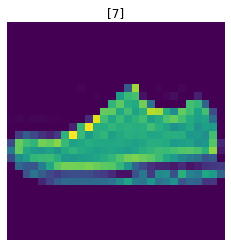

In [11]:
# Load fashion_mnist
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# 檢視圖片的樣子
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title([y_sample])
plt.axis('off');

In [12]:
# Normalize and reshape the range of features
X_train = X_train.reshape(60000,28,28,1)/255
X_test = X_test.reshape(10000,28,28,1)/255

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train[0].shape

(28, 28, 1)

### 3.建立分類 Fashion_mnist 的模型

* 模型CNN部分：有3個conv2D+Maxpooling及1個conv2D+GlobalAveragePooling2D
* 模型全連結層部分：一層50個神經元、一層250個神經元、最後一層為輸出層，有10個神經元

In [33]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              MaxPool2D(),
              Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv_4'),
              GlobalAveragePooling2D()]
FC_layers = [Dense(units=50, activation='relu'),
             Dense(units=250, activation='relu'),
             Dense(units=10, activation='softmax')]

In [34]:
CNN_layers + FC_layers

In [35]:
model = Sequential(CNN_layers + FC_layers) #組裝模型
model.summary() #模型摘要

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 256)        

In [36]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy']) #編譯模型

In [37]:
model.fit(X_train,y_train,batch_size=500,epochs=8,validation_data=(X_test,y_test)) #訓練模型

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 67s 1ms/sample - loss: 1.0484 - categorical_accuracy: 0.5979 - val_loss: 0.7429 - val_categorical_accuracy: 0.7153
Epoch 2/8
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.6159 - categorical_accuracy: 0.7669 - val_loss: 0.5755 - val_categorical_accuracy: 0.7881
Epoch 3/8
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.5231 - categorical_accuracy: 0.8055 - val_loss: 0.5036 - val_categorical_accuracy: 0.8190
Epoch 4/8
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.4554 - categorical_accuracy: 0.8343 - val_loss: 0.4617 - val_categorical_accuracy: 0.8285
Epoch 5/8
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.4198 - categorical_accuracy: 0.8459 - val_loss: 0.4247 - val_categorical_accuracy: 0.8445
Epoch 6/8
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.3819 - c

In [39]:
model.save_weights('Fashion_1.h5') #儲存模型權重

model.load_weights('Fashion_1.h5')

score_train = model.evaluate(X_train, y_train) #評估訓練資料準確率

score_test = model.evaluate(X_test, y_test) #評估測試資料準確率

In [65]:
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}') 

Train Accuracy: 87.68500089645386
Test Accuracy: 86.61999702453613


### 4.使用遷移學習的方法來建立模型

#### 4.1 載入Mnist資料及並對其進行資料前處理

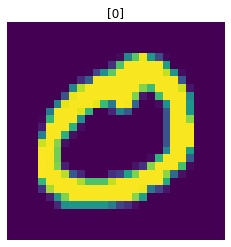

In [44]:
# Load Mnist data
(U_train, v_train0), (U_test, v_test0) = datasets.mnist.load_data()

# 檢視圖片的樣子
idx = np.random.randint(U_train.shape[0])
U_sample = U_train[idx]
v_sample = v_train0[idx].squeeze()

plt.imshow(U_sample)
plt.title([v_sample])
plt.axis('off');

In [45]:
# Normalize the range of features and reshape size
U_train = U_train.reshape(60000,28,28,1)/255
U_test = U_test.reshape(10000,28,28,1)/255

# One-hot encoding
v_train = to_categorical(v_train0, 10)
v_test = to_categorical(v_test0, 10)

#### 4.2 利用transfer learning建立Mnist的模型

In [46]:
# From LeNet-5 for Fashion_mnist
CNN_layers #CNN是跟別人借來的

# New FC layers for Mnist
FC_layers_Mnist = [Dense(units=128, activation='relu'),
                   Dense(units=256, activation='relu'),
                   Dense(units=10, activation='softmax')]

In [47]:
model_Mnist = Sequential(CNN_layers+FC_layers_Mnist) #組裝模型
model_Mnist.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 256)        

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 256)        

* model與model_Mnist的差異：後面的全連結層不同，前面的卷積與持化層(CNN部分)相同

#### 4.2.1 Frozen法

In [49]:
for layer in CNN_layers:
    layer.trainable = False

In [50]:
model_Mnist.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 256)        

In [51]:
model_Mnist.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy']) #編譯模型

In [52]:
model_Mnist.fit(U_train, v_train,
                batch_size=500, 
                epochs=10,
                validation_data=(U_test, v_test)
                ) #訓練模型

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 397us/sample - loss: 1.0505 - categorical_accuracy: 0.6709 - val_loss: 0.5771 - val_categorical_accuracy: 0.8171
Epoch 2/10
60000/60000 [==============================] - 23s 390us/sample - loss: 0.5163 - categorical_accuracy: 0.8328 - val_loss: 0.4324 - val_categorical_accuracy: 0.8579
Epoch 3/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.4131 - categorical_accuracy: 0.8662 - val_loss: 0.3566 - val_categorical_accuracy: 0.8872
Epoch 4/10
60000/60000 [==============================] - 23s 378us/sample - loss: 0.3507 - categorical_accuracy: 0.8877 - val_loss: 0.2976 - val_categorical_accuracy: 0.9032
Epoch 5/10
60000/60000 [==============================] - 23s 379us/sample - loss: 0.3168 - categorical_accuracy: 0.8970 - val_loss: 0.2999 - val_categorical_accuracy: 0.9028
Epoch 6/10
60000/60000 [==============================] - 22s 373us/sample 

score_train = model.evaluate(X_train, y_train) #評估訓練資料準確率

score_test = model.evaluate(X_test, y_test) #評估測試資料準確率

In [62]:
print(f'Train Accuracy:{score_train[1]*100}') 
print(f'Test Accuracy: {score_test[1]*100}')

Train Accuracy:87.68500089645386
Test Accuracy: 86.61999702453613


* 在Frozen情況下：model_Mnist和model的Train Accuracy、Test Accuracy相同

#### 4.2.2 Fine-tune法

In [66]:
for layer in CNN_layers:
    layer.trainable = True

In [67]:
model_Mnist.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 3, 3, 256)        

In [68]:
model_Mnist.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy']) #編譯模型

In [69]:
model_Mnist.fit(U_train, v_train,
                batch_size=500, 
                epochs=10,
                validation_data=(U_test, v_test)
                ) #訓練模型

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.6087 - categorical_accuracy: 0.8584 - val_loss: 0.1212 - val_categorical_accuracy: 0.9602
Epoch 2/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.1113 - categorical_accuracy: 0.9664 - val_loss: 0.0723 - val_categorical_accuracy: 0.9747
Epoch 3/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.0744 - categorical_accuracy: 0.9772 - val_loss: 0.0735 - val_categorical_accuracy: 0.9762
Epoch 4/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0624 - categorical_accuracy: 0.9804 - val_loss: 0.0465 - val_categorical_accuracy: 0.9845
Epoch 5/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0489 - categorical_accuracy: 0.9849 - val_loss: 0.0408 - val_categorical_accuracy: 0.9869
Epoch 6/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.03

score_train = model.evaluate(X_train, y_train) #評估訓練資料準確率

score_test = model.evaluate(X_test, y_test) #評估測試資料準確率

In [72]:
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

Train Accuracy: 73.26499819755554
Test Accuracy: 72.57999777793884


* 使用Fine tune方法的情況下：model_Mnist和model的Train Accuracy、Test Accuracy確實不同！

### 5.模型結果與結論

#### 模型：
* 第一個model：
    * 模型設定：
        - 有四個卷積+池化層：前三個池化層都是Maxpooling、最後一個池化層是GlobalAveragePooling
        - FC層的神經元個數分別為50、250、10
        - activation只有模型最後輸出層為softmax，其他都是relu
        - loss function使用categorical_crossentropy、optimizer用Adam
        - batch_size=500、訓練次數為8次
    * 訓練結果：
        - 訓練資料準確率：0.8760
        - 測試資料準確率：0.8662
        - 沒有overfitting
* 使用遷移學習(model_Mnist)
    * 模型設定：
        - 有四個卷積+池化層：前三個池化層都是Maxpooling、最後一個池化層是GlobalAveragePooling
        - FC層的神經元個數分別為128、256、10
        - activation只有模型最後輸出層為softmax，其他都是relu
        - loss function使用categorical_crossentropy、optimizer用Adam
        - batch_size=500、訓練次數為10次
    * 訓練結果--採用Frozen方法：
        - 訓練資料準確率：0.9293
        - 測試資料準確率：0.9423
        - 沒有overfitting
        - 訓練速度很快(一次23秒)
    * 訓練結果--採用Fine-tune方法：
        - 訓練資料準確率：0.9933
        - 測試資料準確率：0.9870
        - 沒有overfitting
        - 訓練速度比用Frozen慢一點(一次70秒)、但準確率比它高
#### 結論：使用遷移學習的Frozen方式訓練模型真的很快速，訓練時間為Fine-tune方式的1/3，而且兩者的準確率都很高。
    #### 遷移學習可以把別的模型訓練優質的部分放到另一個模型很有趣也很實用！
